In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#matplotlib inline
np.random.seed(2)
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping

#%%
from PIL import Image, ImageChops, ImageEnhance
import os
import itertools

In [ ]:
#%%
def convert_to_ela_image(path, quality):
    temp_filename = 'temp_file_name.jpg'
    ela_filename = 'temp_ela.png'
    
    image = Image.open(path).convert('RGB')
    image.save(temp_filename, 'JPEG', quality = quality)
    temp_image = Image.open(temp_filename)
    
    ela_image = ImageChops.difference(image, temp_image)
    
    extrema = ela_image.getextrema()
    max_diff = max([ex[1] for ex in extrema])
    if max_diff == 0:
        max_diff = 1
    scale = 255.0 / max_diff
    
    ela_image = ImageEnhance.Brightness(ela_image).enhance(scale)
    
    return ela_image
#%%

def prepare_image(image_path):
    return np.array(convert_to_ela_image(image_path, 98).resize([128,128])).flatten() / 255.0
#%%
X_train = [] # ELA converted images
X_test = [] # ELA converted images
Y_train = [] # 0 for fake, 1 for real 
Y_test = [] # 0 for fake, 1 for real 

In [ ]:
#%%
import random
path = '/content/drive/MyDrive/Image_forensics/data_task2/task2/Au_Train/' 
j=0
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        
        if filename.endswith('jpg') or filename.endswith('bmp'):
            j=j+1;
            full_path = os.path.join(dirname, filename)
            X_train.append(prepare_image(full_path))
            Y_train.append(0)
            if len(Y_train) % 500 == 0:
                print(f'Processing {len(Y_train)} images')
                print(j)
                
path = '/content/drive/MyDrive/Image_forensics/data_task2/task2/Tp_Train/' 
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        j=j+1;
        if filename.endswith('jpg') or filename.endswith('tif'):
            full_path = os.path.join(dirname, filename)
            X_train.append(prepare_image(full_path))
            Y_train.append(1)
            if len(Y_train) % 500 == 0:
                print(f'Processing {len(Y_train)} images')
                print(j)

#random.shuffle(X)
path = '/content/drive/MyDrive/Image_forensics/data_task2/task2/Au_Test/' 
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        j=j+1;
        if filename.endswith('jpg') or filename.endswith('bmp'):
            full_path = os.path.join(dirname, filename)
            X_test.append(prepare_image(full_path))
            Y_test.append(0)
            if len(Y_test) % 500 == 0:
                print(f'Processing {len(Y_test)} images')
                print(j)
                
path = '/content/drive/MyDrive/Image_forensics/data_task2/task2/Tp_Test/' 
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        j=j+1;
        if filename.endswith('jpg') or filename.endswith('tif'):
            full_path = os.path.join(dirname, filename)
            X_test.append(prepare_image(full_path))
            Y_test.append(1)
            if len(Y_test) % 500 == 0:
                print(f'Processing {len(Y_test)} images')
                print(j)

                
#%%

X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train = to_categorical(Y_train, 2)

Y_test = to_categorical(Y_test, 2)
X_train = X_train.reshape(-1, 128, 128, 3)
X_test = X_test.reshape(-1, 128, 128, 3)
#%%

#X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.2, random_state=5)
#X = X.reshape(-1,1,1,1)
print(len(X_train), len(Y_train))
print(len(X_test), len(Y_test))

#%%

Processing 500 images
500
Processing 1000 images
1000
Processing 1500 images
1500
Processing 2000 images
2000
Processing 2500 images
2500
Processing 3000 images
3000
Processing 3500 images
3500


/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:767: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 2. Skipping tag 41487
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:767: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 41988
  warnings.warn(


Processing 4000 images
4000
Processing 4500 images
4500
Processing 5000 images
5000
Processing 5500 images
5500
Processing 6000 images
6000
Processing 6500 images
6500
Processing 7000 images
7000
Processing 7500 images
7500
Processing 8000 images
8000
Processing 8500 images
8500
Processing 9000 images
9000
Processing 9500 images
9500
Processing 10000 images
10000
Processing 500 images
10591
Processing 1000 images
11091
Processing 1500 images
11591
Processing 2000 images
12091
Processing 2500 images
12591
10091 10091
2523 2523


In [ ]:

def build_model():
    model = Sequential()
    model.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'valid', activation = 'relu', input_shape = (128, 128, 3)))
    model.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'valid', activation = 'relu', input_shape = (128, 128, 3)))
   
    model.add(Conv2D(filters = 32, kernel_size = (7, 7), padding = 'valid', activation = 'relu', input_shape = (128, 128, 3)))

    model.add(MaxPool2D(pool_size = (2, 2)))
   
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(256, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation = 'softmax'))
    return model


from keras.optimizers import Adam


from keras.callbacks import ModelCheckpoint, EarlyStopping
#%%
model = build_model()
model.summary()
epochs = 100
batch_size = 64
init_lr = 1e-5
optimizer = Adam(lr = init_lr, decay = init_lr/epochs)
model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
#%%


checkpoint = ModelCheckpoint("/content/drive/MyDrive/Image_forensics/data_task2/model_best_98.h5", monitor='val_accuracy', verbose=0, save_best_only=True, save_weights_only=False, mode='auto')
early_stopping = EarlyStopping(monitor = 'val_accuracy', min_delta = 0, patience = 300, verbose = 0, mode = 'auto')
#%%
hist = model.fit(X_train,
                 Y_train,
                 batch_size = batch_size,
                 epochs = epochs,
                validation_data = (X_test, Y_test),
                callbacks = [checkpoint,early_stopping])

#%%
#model.save('model_casia_best.h5')
#%%

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 32)      9248      
                                                                 
 conv2d_2 (Conv2D)           (None, 118, 118, 32)      50208     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 59, 59, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 59, 59, 32)        0         
                                                                 
 flatten (Flatten)           (None, 111392)            0         
                                                        

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
158/158 [==============================] - 34s 146ms/step - loss: 0.6398 - accuracy: 0.5991 - val_loss: 0.5728 - val_accuracy: 0.6377
Epoch 2/100
158/158 [==============================] - 18s 113ms/step - loss: 0.4798 - accuracy: 0.7843 - val_loss: 0.3947 - val_accuracy: 0.8530
Epoch 3/100
158/158 [==============================] - 18s 112ms/step - loss: 0.3645 - accuracy: 0.8589 - val_loss: 0.3354 - val_accuracy: 0.8601
Epoch 4/100
158/158 [==============================] - 19s 118ms/step - loss: 0.3199 - accuracy: 0.8811 - val_loss: 0.3166 - val_accuracy: 0.8648
Epoch 5/100
158/158 [==============================] - 27s 173ms/step - loss: 0.2981 - accuracy: 0.8932 - val_loss: 0.2953 - val_accuracy: 0.8835
Epoch 6/100
158/158 [==============================] - 15s 95ms/step - loss: 0.2879 - accuracy: 0.8965 - val_loss: 0.2950 - val_accuracy: 0.8771
Epoch 7/100
158/158 [==============================] - 18s 113ms/step - loss: 0.2794 - accuracy: 0.8974 - val_loss: 0.2801 - 

In [ ]:
def plot(var1, var2, plot_name):
  # Get the loss metrics from the trained model
  c1 = hist.history[var1]
  c2 = hist.history[var2]

  epochs = range(len(c1))
  
  # Plot the metrics
  plt.plot(epochs, c1, 'b', label='Train '+ var1)
  plt.plot(epochs, c2, 'r', label=var2)
  plt.title(str(plot_name))
  plt.legend()

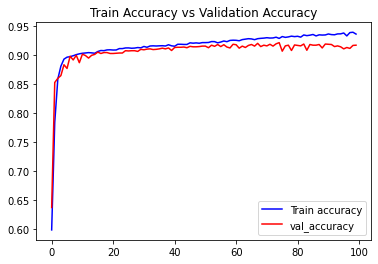

In [ ]:
plot('accuracy','val_accuracy','Train Accuracy vs Validation Accuracy')

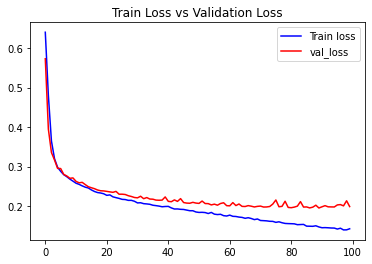

In [ ]:
plot('loss','val_loss','Train Loss vs Validation Loss')